# Census Income
This is a Sci-Kit Learn + Pandas example of classification problem. The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
# Uncomment this if you are using Google Colab
!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv

--2020-12-15 18:53:38--  https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3152687 (3.0M) [text/plain]
Saving to: ‘census.csv’

census.csv          100%[===================>]   3.01M  --.-KB/s    in 0.09s   

2020-12-15 18:53:39 (34.2 MB/s) - ‘census.csv’ saved [3152687/3152687]



### Load dataset

In [ ]:
df = pd.read_csv("./census.csv")

print (df.shape)
print (df.columns)
df.head()

(32561, 12)
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## Task 1 - Initial analysis
Perform initial analysis to understand the data.

In [ ]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
for column in df:
  print(column, np.unique(df[column]))

age [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
workclass ['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
education ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
education-num [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
marital-status ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
occupation ['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
relationship ['

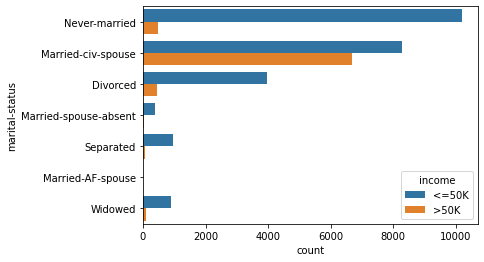

In [ ]:
sns.countplot(y='marital-status', hue='income', data=df)

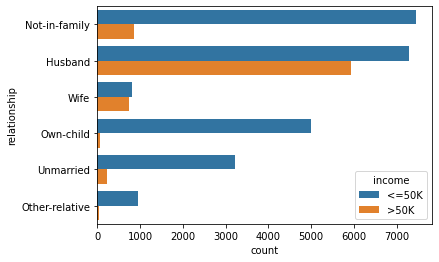

In [ ]:
sns.countplot(y='relationship', hue='income', data=df)

In [ ]:
df['workclass'] = df['workclass'].replace(['Without-pay','Never-worked'],'?')
df['workclass'].value_counts() # need to me repair data

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: workclass, dtype: int64

In [ ]:
df['occupation'] = df['occupation'].replace('Armed-Forces', 'Protective-serv')
df['occupation'].value_counts() 

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       658
Priv-house-serv       149
Name: occupation, dtype: int64

In [ ]:
df['native-country'].value_counts() #to 

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

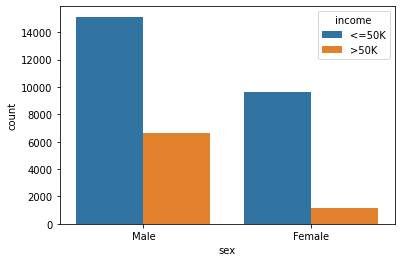

In [ ]:
sns.countplot(x='sex', hue='income', data=df)

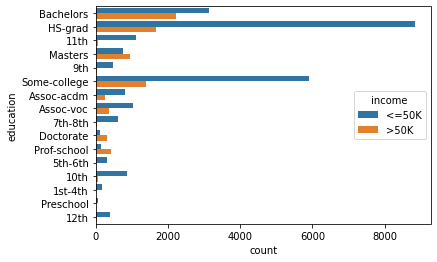

In [ ]:
sns.countplot(y='education', hue='income', data=df)

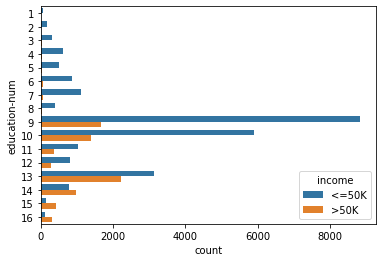

In [ ]:
sns.countplot(y='education-num', hue='income', data=df)

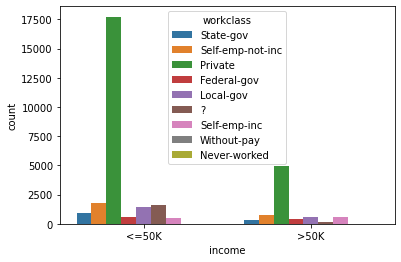

In [ ]:
sns.countplot(x='income', hue='workclass', data=df)

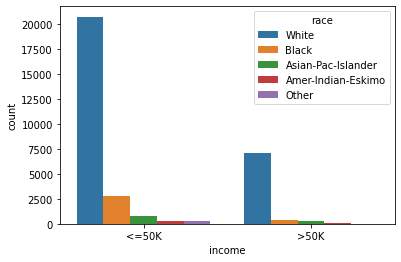

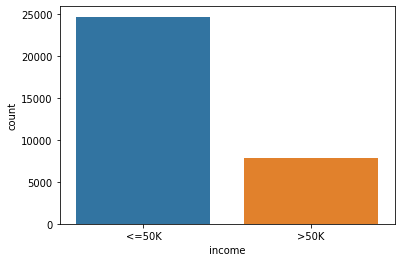

In [ ]:
sns.countplot(x='income', data = df)

,age,education-num,hours-per-week
age,1.00,0.04,0.07
education-num,0.04,1.00,0.15
hours-per-week,0.07,0.15,1.00


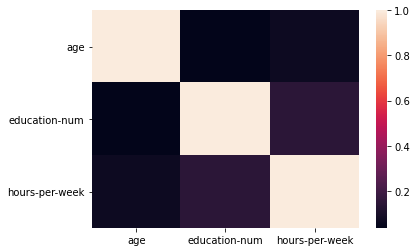

In [ ]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

## Task 2 - Preparing data
- Select features `X` and labels `y`. Make sure that your selection makes sense.
- Change the data into a numerical form to let your algorithm (logistic regression) deal with them
- Perform One-hot encoding if necessary
- Split your data into train and test subsets. Make sure that your split is reasonable. Use `stratify` if you consider it helpful.

In [ ]:
y = df['income']
y.shape
y.head()
y.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:

y.replace("<=50K", 0, inplace=True)
y.replace(">50K", 1, inplace=True)

y.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [ ]:
X = df[['age','workclass','education-num','occupation','relationship','hours-per-week']]
X.shape
X.head()

,age,workclass,education-num,occupation,relationship,hours-per-week
0,39,State-gov,13,Adm-clerical,Not-in-family,40
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,13
2,38,Private,9,Handlers-cleaners,Not-in-family,40
3,53,Private,7,Handlers-cleaners,Husband,40
4,28,Private,13,Prof-specialty,Wife,40


In [ ]:
X = pd.get_dummies(X, columns=['workclass', 'occupation','relationship'])
X.head()

,age,education-num,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,occupation_?,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,13,40,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,50,13,13,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,38,9,40,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,7,40,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,28,13,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 1)


In [ ]:
print ('X train shape:', X_train.shape)
print ('X test shape:', X_test.shape)
print ('y train shape:', y_train.shape)
print ('y test shape:', y_test.shape)

X train shape: (22792, 30)
X test shape: (9769, 30)
y train shape: (22792,)
y test shape: (9769,)


0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

## Task 4 - Logistic Regression
Train and test a logistic regression model. If you want to get a maximum score you must be sure that your model:
- Do not overfit
- Do not underfit
- Achieves at least 80% accuracy on the test subset.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1200)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Train score",model.score(X_train,y_train))
print("Test score",model.score(X_test,y_test))

Train score 0.8345472095472095
Test score 0.8349882280683796


NameError: ignored

## Task 5 - Precision and recall
- Compute precision and recall for your model, for both, train and test subsets.
- Make sure that you understand these metrics, you may be asked to explain the meaning of it.

In [ ]:
from sklearn.metrics import classification_report
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(classification_report(y_train, y_pred_train))
print('\n')
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.87      0.92      0.89     17303
           1       0.70      0.55      0.62      5489

    accuracy                           0.83     22792
   macro avg       0.78      0.74      0.76     22792
weighted avg       0.83      0.83      0.83     22792



              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7417
           1       0.69      0.56      0.62      2352

    accuracy                           0.83      9769
   macro avg       0.78      0.74      0.76      9769
weighted avg       0.83      0.83      0.83      9769



In [ ]:
print(X_train)

       age  education-num  ...  relationship_Unmarried  relationship_Wife
11662   47             13  ...                       1                  0
18348   34              6  ...                       1                  0
5962    38             10  ...                       0                  0
30669   41             13  ...                       0                  0
6244    18              7  ...                       0                  0
...    ...            ...  ...                     ...                ...
5913    18              7  ...                       0                  0
7103    32             10  ...                       0                  0
13327   49              9  ...                       0                  0
12279   29             13  ...                       0                  1
25073   39              9  ...                       1                  0

[22792 rows x 30 columns]


In [ ]:
x

## Task 6: Applying the model
Use your model to check if you will earn above 50,000$ per year. Check both the response from the model (true/false) and the probability that the response will be true. Check using the data about yourself:
- right now
- two years from now
- ten years from now

In [ ]:
print(X.columns)

Index(['age', 'education-num', 'hours-per-week', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife'],
      dtype='object')


In [ ]:
dane={
    'age' : [21, 23, 31],
    'education-num' : [13, 14, 16],
    'hours-per-week' : [0, 15, 56],
    'workclass_?' : [1, 0, 0],
    'workclass_Federal-gov' : [0, 0, 0],
    'workclass_Local-gov' : [0, 0, 0],
    'workclass_Private' : [0, 1, 1],
    'workclass_Self-emp-inc' : [0, 0, 0],
    'workclass_Self-emp-not-inc' : [0, 0, 0],
    'workclass_State-gov' : [0, 0, 0],
    'occupation_?' : [1, 0, 0],
    'occupation_Adm-clerical' : [0, 0, 0],
    'occupation_Craft-repair' : [0, 0, 0],
    'occupation_Exec-managerial' : [0, 0, 0],
    'occupation_Farming-fishing' : [0, 0, 0],
    'occupation_Handlers-cleaners' : [0, 0, 0],
    'occupation_Machine-op-inspct' : [0, 0, 0],
    'occupation_Other-service' : [0, 0, 0],
    'occupation_Priv-house-serv' : [0, 0, 0],
    'occupation_Prof-specialty' : [0, 0, 1],
    'occupation_Protective-serv' : [0, 0, 0],
    'occupation_Sales' : [0, 0, 0],
    'occupation_Tech-support' : [0, 1, 0],
    'occupation_Transport-moving' : [0, 0, 0],
    'relationship_Husband' : [0, 0, 1],
    'relationship_Not-in-family' : [0, 0, 0],
    'relationship_Other-relative' : [0, 0, 0],
    'relationship_Own-child' : [0, 0, 0],
    'relationship_Unmarried' : [1, 1, 0],
    'relationship_Wife' : [0, 0, 0]
    
}

me = pd.DataFrame.from_dict(dane)
me.head()

,age,education-num,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,occupation_?,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,21,13,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,23,14,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,31,16,56,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
me_pred = model.predict(me)
print(me_pred)

[0 0 1]


In [ ]:
print(model.predict_proba(me))

[[0.99086337 0.00913663]
 [0.92178101 0.07821899]
 [0.1427398  0.8572602 ]]
